In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-08 04:36:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  16.0MB/s    in 18s     

2020-10-08 04:37:00 (16.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# membuat nama directori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(train_paper)
os.mkdir(train_rock)
os.mkdir(train_scissors)

In [ ]:
os.mkdir(val_paper)
os.mkdir(val_rock)   
os.mkdir(val_scissors)

In [ ]:
# memecah direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# memecah direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [ ]:
import shutil

for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images',
 'rock',
 'README_rpc-cv-images.txt',
 'scissors',
 'train',
 'val',
 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/train')

['rock', 'scissors', 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/val')

['rock', 'scissors', 'paper']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_paper_paper_dir = os.path.join(train_dir, 'paper')
 
# membuat direktori ruangan berantakan pada direktori data training
train_paper_paper_dir = os.path.join(train_dir, 'rock')

# membuat direktori ruangan berantakan pada direktori data training
train_scissors_scissors_dir = os.path.join(train_dir, 'scissors')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_paper_paper_dir = os.path.join(validation_dir, 'paper')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_rock_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_scissors_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.6486 - accuracy: 0.6533 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 2/20
25/25 - 6s - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 3/20
25/25 - 6s - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6373 - val_accuracy: 0.6667
Epoch 4/20
25/25 - 6s - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 5/20
25/25 - 6s - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 6/20
25/25 - 6s - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 7/20
25/25 - 6s - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 8/20
25/25 - 6s - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 9/20
25/25 - 6s - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 10/20
25/25 - 6s - loss: 0.6365 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 11/20
25/25 -

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
0a3UtNzl5Ll3sq8K.png
paper


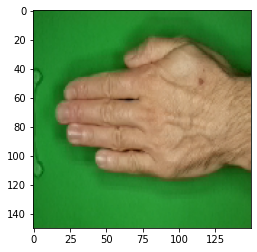

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving 2J7q0JbqJrjmZC05.png to 2J7q0JbqJrjmZC05.png
2J7q0JbqJrjmZC05.png
paper


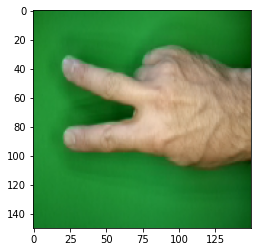

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (1).png
00nKV8oHuTGi20gq.png
scissors


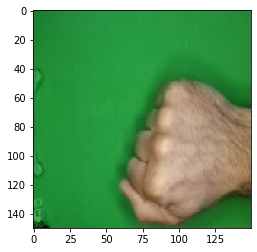

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes == 1:
    print('paper')
  elif classes == 2:
    print('rock')
  else:
    print('scissors')

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images',
 'rock',
 'README_rpc-cv-images.txt',
 'scissors',
 'train',
 'val',
 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/train')

['rock', 'scissors', 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/val')

['rock', 'scissors', 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/train/paper')

['74FZPuPPfVCwqHgO.png',
 'YrEfjld9tYk0b9m9.png',
 'OJpDyt2u6zzfoVP0.png',
 'Z5ioSnqxnoCUixRW.png',
 'q35FqG8h9VCDbQ1J.png',
 'B3dlyiRDulDJWOsW.png',
 '5Cy2fFOaWMFwa5iu.png',
 '7fRLxoheLluOwCkp.png',
 'Zx5NMbS4YBf29guF.png',
 'crYtjQcVKQjCAWYq.png',
 'cUFSYeNYdnhRB6MD.png',
 'v6Ypsa9vPurMnl20.png',
 'u5672IrPHHkppdEK.png',
 '7IYZ788SAadhvemj.png',
 'yYba9sH9TlYCAtoo.png',
 'IxQ1CVKgnpiD0HfY.png',
 'ldG6HLXeY0KilKyr.png',
 '9zuFLFklb0ibEelE.png',
 'qVqPFRhMJXPFh8Yb.png',
 'O0fq1v7s6qxN8o9L.png',
 'ueuECCtQxOjHF1ij.png',
 'ZjHU1M9wOwgrm7SX.png',
 'Rxmuq5Y6dw22QESt.png',
 'iGiF1suI8wXP6A2r.png',
 'BoMfAmQYWtoiGHBV.png',
 'K6IACWoiTOnGR9Np.png',
 'byBLmTC0iWfnT7wo.png',
 'qWHWCHG7exZiCfdq.png',
 'U3XlUGS4C4YGpjGP.png',
 'aKUFn8PEF7LP8BaX.png',
 'kz9TBAHLFXGnHCiF.png',
 'lqo55attrFxuKqlu.png',
 'IXh9BTFQQ6AIaBpr.png',
 'CrEzO2508GiIMFrx.png',
 '2F8Ng7620ANA7tEK.png',
 'cI2tl5vM2koXZPfG.png',
 'HQSUE6P23pvLctuy.png',
 'svY0FVnjij1nSJDK.png',
 'TcybcTuKdMPA4xpT.png',
 '9OyGmAsWD5Ie6QIa.png',


Saving 1i1dlQrE6JnhYXE4.png to 1i1dlQrE6JnhYXE4.png
1i1dlQrE6JnhYXE4.png
rock


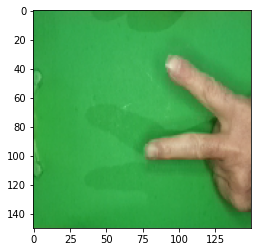

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes [0,0]!=0:
    print('rock')
  elif classes [0,1]!=0:
    print('scissors')
  else:
    print('paper')

In [ ]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 7s - loss: 1.1975 - accuracy: 0.3100 - val_loss: 1.0899 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 7s - loss: 1.0929 - accuracy: 0.3800 - val_loss: 1.0689 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 7s - loss: 1.1142 - accuracy: 0.3300 - val_loss: 1.0836 - val_accuracy: 0.3500
Epoch 4/20
25/25 - 7s - loss: 1.0644 - accuracy: 0.4300 - val_loss: 1.0096 - val_accuracy: 0.5500
Epoch 5/20
25/25 - 7s - loss: 0.9561 - accuracy: 0.6000 - val_loss: 0.9161 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 7s - loss: 0.7906 - accuracy: 0.6400 - val_loss: 0.7863 - val_accuracy: 0.6000
Epoch 7/20
25/25 - 7s - loss: 0.7109 - accuracy: 0.6700 - val_loss: 0.8650 - val_accuracy: 0.7000
Epoch 8/20
25/25 - 7s - loss: 0.3759 - accuracy: 0.8600 - val_loss: 1.1585 - val_accuracy: 0.6000
Epoch 9/20
25/25 - 7s - loss: 0.3672 - accuracy: 0.8700 - val_loss: 0.4046 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 7s - loss: 0.3329 - accuracy: 0.8500 - val_loss: 0.3811 - val_accuracy: 0.8500
Epoch 11/20
25/25 -

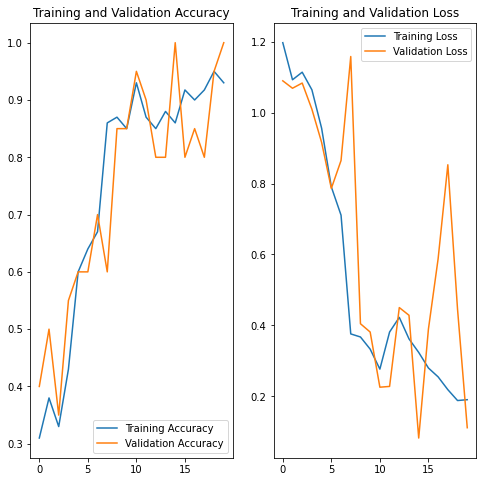

In [ ]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm (2).png
0bioBZYFCXqJIulm.png
rock


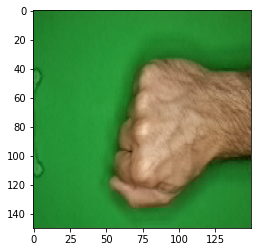

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving 0P6uxM8Vr1DwySHe.png to 0P6uxM8Vr1DwySHe (2).png
0P6uxM8Vr1DwySHe.png


ValueError: ignored

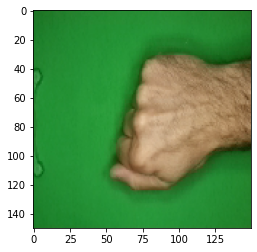

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes!=0:
    print('paper')
  elif classes!=1:
    print('rock')
  else:
    print('scissors')

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K (7).png
0a3UtNzl5Ll3sq8K.png
paper


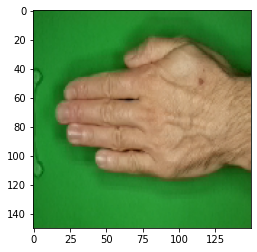

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K (10).png
0a3UtNzl5Ll3sq8K.png
paper


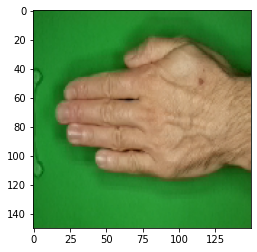

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]:
    print('paper')
  elif classes[0,1]:
    print('rock')
  else:
    print('scissor')